# Fraud Detection Analysis
The purpose of this project is to create a model in order to classify if a credit card transaction is a fraud or not, in order to do that I'm going to use a huge database and also try different models such as Decision Tree and the more adavnced Ada Boost Model.

P.s. I want to state that this is one the first model and I know that is very unefficient and texty but I'm publishing it beacuse I put a lot of effort in the model it has been so useful to improve my skills. I hope you'll enjoy it!
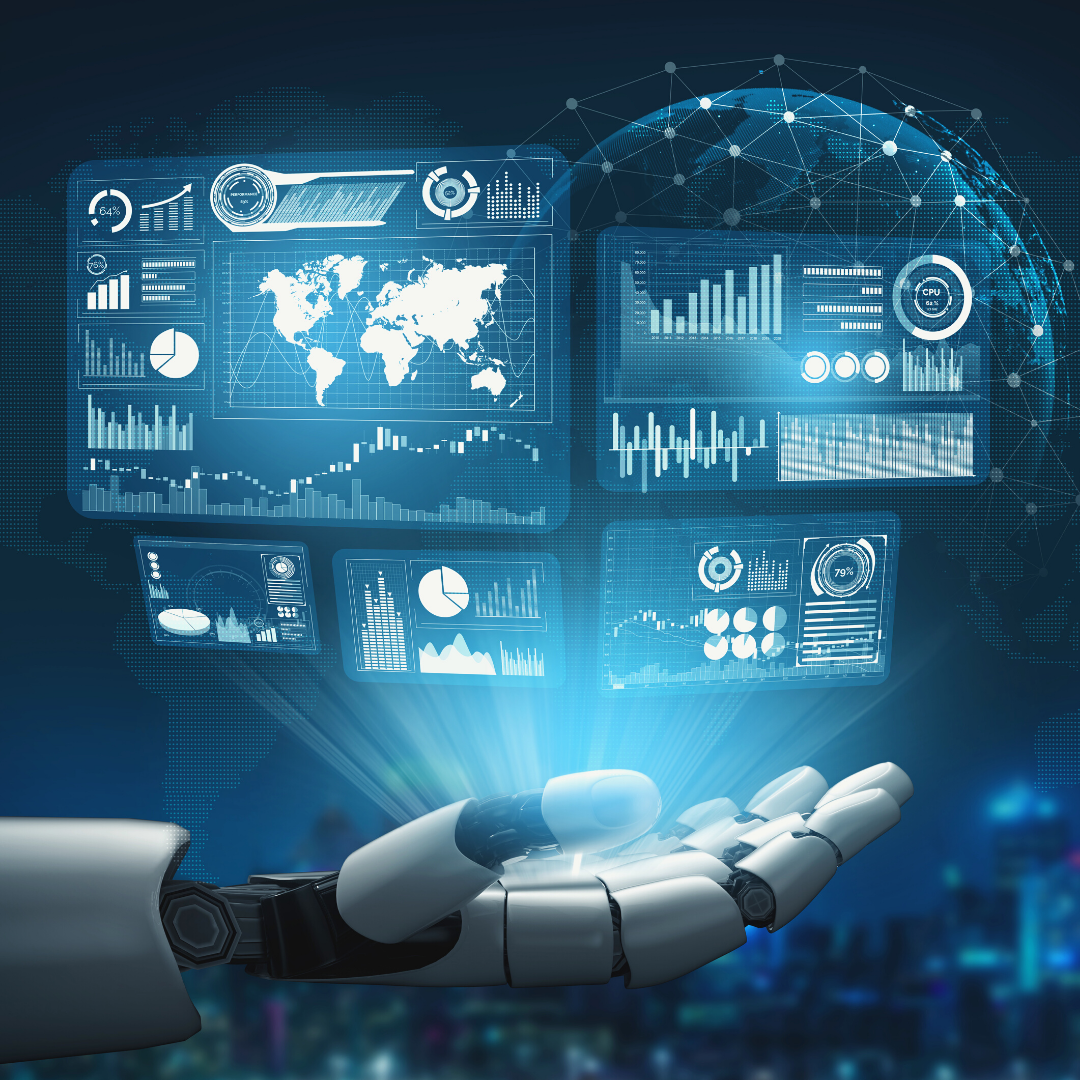


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path= r"C:\Users\Utente\Desktop\Various Datasets\creditcardfraud\creditcard.csv"

In [3]:
pd.options.display.float_format = '{:.2f}'.format
df =pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
df1=df.drop(df.index[15000:284807])
#dropping a large part of the dataframe for hardware reason (my laptop isn't that powerful)

In [5]:
df1['Class'].value_counts()

0    14939
1       61
Name: Class, dtype: int64

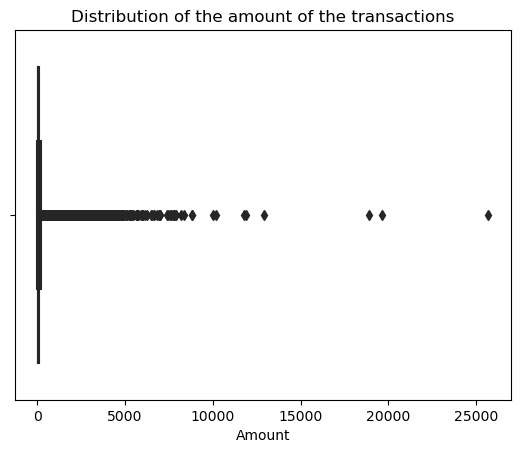

In [50]:
import matplotlib.pyplot as plt
sns.boxplot(data=df,x='Amount',color='purple')
plt.title("Distribution of the amount of the transactions");

In [7]:
from sklearn.model_selection import train_test_split
X=df1.drop(['Class','Time'],axis=1)
y=df1['Class']
X_train,X_val, y_train, y_val= train_test_split(X,y,test_size=0.4)

In [8]:
X_train.shape

(9000, 29)

In [9]:
y_train.shape

(9000,)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
tree_params={'min_samples_split':[2,3,4], 'max_depth':[4,5,8]}
dtc_gs=GridSearchCV(dtc,tree_params,scoring='r2',refit='r2',verbose=4)
dtc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..max_depth=4, min_samples_split=2;, score=0.498 total time=   0.0s
[CV 2/5] END ..max_depth=4, min_samples_split=2;, score=0.666 total time=   0.0s
[CV 3/5] END ..max_depth=4, min_samples_split=2;, score=0.833 total time=   0.0s
[CV 4/5] END ..max_depth=4, min_samples_split=2;, score=0.498 total time=   0.0s
[CV 5/5] END .max_depth=4, min_samples_split=2;, score=-0.003 total time=   0.0s
[CV 1/5] END ..max_depth=4, min_samples_split=3;, score=0.833 total time=   0.0s
[CV 2/5] END ..max_depth=4, min_samples_split=3;, score=0.666 total time=   0.0s
[CV 3/5] END ..max_depth=4, min_samples_split=3;, score=0.833 total time=   0.0s
[CV 4/5] END ..max_depth=4, min_samples_split=3;, score=0.833 total time=   0.0s
[CV 5/5] END ..max_depth=4, min_samples_split=3;, score=0.164 total time=   0.0s
[CV 1/5] END ..max_depth=4, min_samples_split=4;, score=0.666 total time=   0.0s
[CV 2/5] END ..max_depth=4, min_samples_split=4;,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 8],
                         'min_samples_split': [2, 3, 4]},
             refit='r2', scoring='r2', verbose=4)

In [11]:
dtc_gs.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [12]:
dtc_gs.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [13]:
dtc_preds=dtc_gs.predict(X_val)

# Random Forest with Oversapling

In [14]:
y_train.value_counts()

0    8970
1      30
Name: Class, dtype: int64

In [15]:
base_accuracy = y_train.value_counts(normalize=True).max()
print(base_accuracy)

0.9966666666666667


The distribution of the values is definitevely imbalanced

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)
print('X_train shape:',X_train_ros.shape)
print('y_train shape:',y_train_ros.shape)

X_train shape: (17940, 29)
y_train shape: (17940,)


In [17]:
base_accuracy_over = y_train_ros.value_counts(normalize=True).max()
print(base_accuracy_over)

0.5


In [18]:
dtc_gs_ros=GridSearchCV(dtc,tree_params,scoring='r2',refit='r2',verbose=4)
dtc_gs_ros.fit(X_train_ros,y_train_ros)
dtc_gs_ros.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..max_depth=4, min_samples_split=2;, score=1.000 total time=   0.0s
[CV 2/5] END ..max_depth=4, min_samples_split=2;, score=0.998 total time=   0.0s
[CV 3/5] END ..max_depth=4, min_samples_split=2;, score=0.998 total time=   0.0s
[CV 4/5] END ..max_depth=4, min_samples_split=2;, score=0.997 total time=   0.0s
[CV 5/5] END ..max_depth=4, min_samples_split=2;, score=0.997 total time=   0.0s
[CV 1/5] END ..max_depth=4, min_samples_split=3;, score=1.000 total time=   0.0s
[CV 2/5] END ..max_depth=4, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 3/5] END ..max_depth=4, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 4/5] END ..max_depth=4, min_samples_split=3;, score=0.997 total time=   0.0s
[CV 5/5] END ..max_depth=4, min_samples_split=3;, score=0.996 total time=   0.0s
[CV 1/5] END ..max_depth=4, min_samples_split=4;, score=1.000 total time=   0.0s
[CV 2/5] END ..max_depth=4, min_samples_split=4;,

DecisionTreeClassifier(max_depth=8, min_samples_split=4)

In [19]:
dtc_ros_preds=dtc_gs_ros.predict(X_val)

# Ada Boost Classifier Model

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
ada=AdaBoostClassifier(random_state=2)

ada_params={'learning_rate': [0.08,0.1,0.12,0.14], 'n_estimators':[5,10,20]}
ada_rs=RandomizedSearchCV(ada,ada_params,random_state=2)


In [21]:
ada_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=2),
                   param_distributions={'learning_rate': [0.08, 0.1, 0.12,
                                                          0.14],
                                        'n_estimators': [5, 10, 20]},
                   random_state=2)

In [22]:
ada_best= ada_rs.best_estimator_
print(ada_best)

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=2)


In [23]:
ada_preds=ada_rs.predict(X_val)


In [24]:
print(ada_preds[:10])


[0 0 0 0 0 0 0 0 0 0]


In [25]:
ada_preds_ser=pd.Series(ada_preds)
type(ada_preds_ser)

pandas.core.series.Series

In [26]:
ada_preds_ser.value_counts()

0    5980
1      20
dtype: int64

# Accuracy metric

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score,recall_score, f1_score, roc_auc_score

In [28]:
dtc_accuracy=(dtc_preds==y_val).mean()*100
print(dtc_accuracy,'%')

99.9 %


In [29]:
dtc_accuracy_ros=accuracy_score(y_val,dtc_ros_preds)*100
print(dtc_accuracy_ros,'%')

99.81666666666666 %


In [30]:
ada_accuracy= accuracy_score(y_val,ada_preds)*100
print(ada_accuracy,'%')

99.78333333333333 %


# Predict probability

In [31]:
ada_preds_proba=ada_rs.predict_proba(X_val)
dtc_ros_preds_proba=dtc_gs_ros.predict_proba(X_val)
dtc_preds_proba=dtc_gs.predict_proba(X_val)

# Confusion Matrix

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000019BB7262350> Ada Boost
<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000019BBADF3940> Dtc_ros
<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000019BBA557430> dtc
<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000019BB8B66710> LR


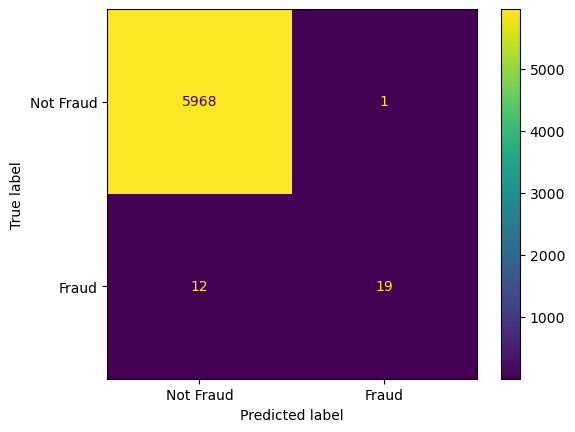

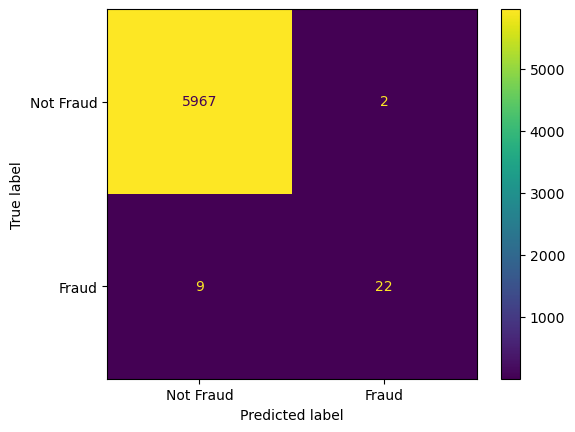

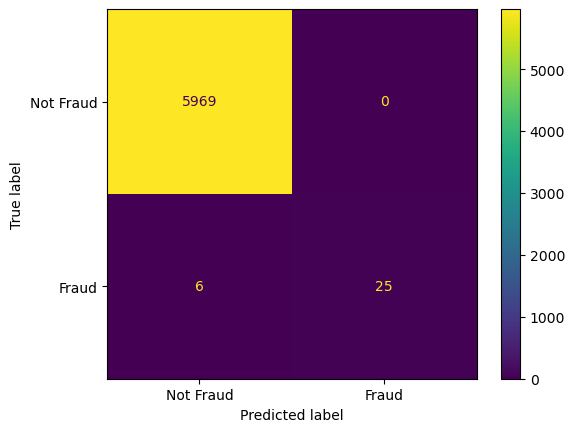

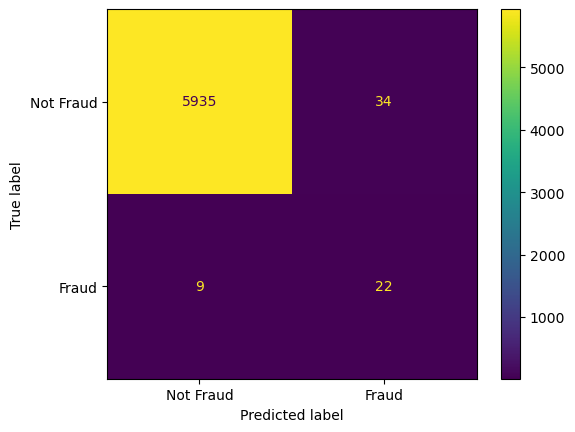

In [52]:
cmd_dtc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val,dtc_preds), display_labels = ['Not Fraud', 'Fraud'])
cmd_dtc_ros=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val,dtc_ros_preds), display_labels = ['Not Fraud', 'Fraud'])
cmd_ada=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val,ada_preds), display_labels = ['Not Fraud', 'Fraud'])

print(cmd_ada.plot(),'Ada Boost')
print(cmd_dtc_ros.plot(),'Dtc_ros')
print(cmd_dtc.plot(),'dtc')
print(cmd_lr.plot(),'LR')

Precision score
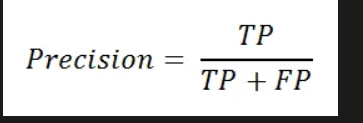

In [34]:
dtc_precision=precision_score(y_val,dtc_preds)*100
dtc_ros_precision=precision_score(y_val,dtc_ros_preds)*100
ada_precision=precision_score(y_val,ada_preds)*100
print('The Decision Tree Classifier model (Oversampling) precision is:',dtc_ros_precision,'%')
print('The Decision Tree Classifier model precision is:',dtc_precision,'%')
print('The Ada Boost model precision is: ',ada_precision,'%')

The Decision Tree Classifier model (Oversampling) precision is: 91.66666666666666 %
The Decision Tree Classifier model precision is: 100.0 %
The Ada Boost model precision is:  95.0 %


# Recall metric
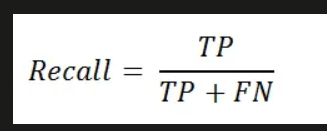

In [35]:
dtc_rec=recall_score(y_val,dtc_preds)*100
dtc_ros_rec=recall_score(y_val,dtc_ros_preds)*100
ada_rec=recall_score(y_val,ada_preds)*100
print('The Decision Tree Classifier model recall is:',dtc_rec,'%')
print('The Decision Tree Classifier (Oversampling) model recall is:',dtc_ros_rec,'%')
print('The Ada Boost model recall is: ',ada_rec,'%')

The Decision Tree Classifier model recall is: 80.64516129032258 %
The Decision Tree Classifier (Oversampling) model recall is: 70.96774193548387 %
The Ada Boost model recall is:  61.29032258064516 %


The recall metric is the most important for this kind of analysis because we want to maximize the number of fraud detected, in other words a false negative is worst than a false positive.

# F1 metric
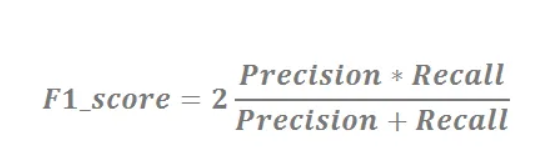

In [36]:
F1_dtc_score=((dtc_rec*dtc_precision)*2)/(dtc_rec+dtc_precision)
print('The F1 score for Decision Tree Model is:',F1_dtc_score,'%')

The F1 score for Decision Tree Model is: 89.28571428571429 %


In [37]:
F1_dtc_score=f1_score(y_val,dtc_preds)
F1_dtc_ros_score=f1_score(y_val,dtc_ros_preds)
F1_ada_score=f1_score(y_val,ada_preds)
print('The F1 score for Decision Tree Model is:',F1_dtc_score)
print('The F1 score for Decision Tree Model (oversampling) is:',F1_dtc_ros_score)
print('The F1 score for Ada Boost Model is:',F1_ada_score)

The F1 score for Decision Tree Model is: 0.8928571428571428
The F1 score for Decision Tree Model (oversampling) is: 0.7999999999999999
The F1 score for Ada Boost Model is: 0.7450980392156863


# Log Loss Metric
(The lower the better)

In [38]:
from sklearn.metrics import log_loss
logloss_dtc=log_loss(y_val,dtc_preds)
logloss_dtc_ros=log_loss(y_val,dtc_ros_preds)
logloss_ada=log_loss(y_val,ada_preds)
print('dtc:',logloss_dtc)
print('dtc_ros:',logloss_dtc_ros)
print('ada:',logloss_ada)

dtc: 0.03604365338911738
dtc_ros: 0.06608003121338167
ada: 0.07809458234308739


# ROC AUC Metric

In [39]:
from sklearn.metrics import roc_auc_score
rocauc_dtc=roc_auc_score(y_val,dtc_preds)
rocauc_dtc_ros=roc_auc_score(y_val,dtc_ros_preds)
rocauc_ada=roc_auc_score(y_val,ada_preds)

print('dtc:',rocauc_dtc)
print('dtc_ros:',rocauc_dtc_ros)
print('ada:',rocauc_ada)

dtc: 0.9032258064516129
dtc_ros: 0.8546711774274612
ada: 0.8063678467782467


# Threshold optimization

In [45]:
thresholds=np.arange(0.1,1,0.05)
thresholds

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [46]:
for threshold in thresholds:
    predictions = (lr_pred >= threshold).astype(int)
    accuracy_lr=(predictions==y_val).astype(int).mean()
    print(f"Threshold: {threshold:.2f} | Metric: {accuracy_lr:.4f} | Preds: {predictions[1:10]}")
    #pr= pd.Series(predictions)
    #print(f"Threshold: {threshold:.2f}")
    #metric=accuracy_score(y_val, predictions)
    #print(f"Threshold: {threshold:.2f} | Metric: {metric:.4f}")


Threshold: 0.10 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.15 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.20 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.25 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.30 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.35 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.40 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.45 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.50 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.55 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.60 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.65 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.70 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.75 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.80 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshold: 0.85 | Metric: 0.9928 | Preds: [0 0 0 0 0 0 0 0 0]
Threshol

As we can see from the output below changing the threshold does not affect the accuracy of the model.

# Conclusions

At the end, if considering all the metrics, the model the performed better seems to be classic Decision Tree Classifier, that got the best score among the others in almost every metrics.

In conclusion we can state that this model can predict almost with certainty if a transaction is a fraud or not.